In [1937]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
import tarfile
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [1938]:
pd.set_option('display.max_columns', None)

In [1939]:
#Load tar.gz file into Python
#We are using day 1 of 7

tar = tarfile.open("hitdata7days_0.tar.gz","r:gz")

In [1940]:
#Extracting filename from TarInfo object
#Gives name of file - can be regular data file or directory 

tar.next()

tn = tar.next()
print(tn.name)

tn1 = tar.next()
print(tn1.name)

tn2 = tar.next()
print(tn2.name)

tn3 = tar.next()
print(tn3.name)

tn4 = tar.next()
print(tn4.name)

tn5 = tar.next()
print(tn5.name)

tn6 = tar.next()
print(tn6.name)

tn7 = tar.next()
print(tn7.name)

tn8 = tar.next()
print(tn8.name)

hitdata7days/visitday=10/0017_part_00.parquet
hitdata7days/visitday=10/0050_part_00.parquet
hitdata7days/visitday=10/0049_part_00.parquet
hitdata7days/visitday=10/0033_part_00.parquet
hitdata7days/visitday=10/0001_part_00.parquet
hitdata7days/visitday=10/0018_part_00.parquet
hitdata7days/visitday=10/0083_part_00.parquet
hitdata7days/visitday=10/0065_part_00.parquet
hitdata7days/visitday=10/0117_part_00.parquet


In [1941]:
#Reading info from parquet file
#Gives info on data types of columns in 1 parquet file

pq.read_schema(tn.name)

hitdatahistorymkey: int64
filename: string
linenumber: int32
brandcode: string
visitoridhigh: decimal128(20, 0)
visitoridlow: decimal128(20, 0)
visitnumber: decimal128(10, 0)
visitdatetime: timestamp[ns]
visitdate: date32[day]
visitmonth: int32
fiscalyear: int16
fiscalmonthnumber: int16
fiscalweeknumber: int16
hit_time_gmt: decimal128(11, 0)
service: string
acceptlanguage: string
eventlist: string
homepage: string
ip: string
pageevent: decimal128(3, 0)
pageeventvar1: string
pageeventvar2: string
pagetype: string
pageurl: string
pagename: string
productlist: string
userserver: string
channel: string
sitesection: string
category: string
subcategory: string
subcategory2: string
pagecategory: string
searchterms: string
searchresults: string
refinementtype: string
refinementattribute: string
myaccountengagement: string
formanalysis: string
emailsubscriptionadd: string
emailsubscriptionremove: string
linklocation: string
navigationlinks: string
searchtype: string
businessunit: string
categor

In [1942]:
#Read in parquet file as pandas DataFrame
#Turns parquet file into data frame

df = pd.read_parquet(tn.name)

df1 = pd.read_parquet(tn1.name)

df2 = pd.read_parquet(tn2.name)

df3 = pd.read_parquet(tn3.name)

df4 = pd.read_parquet(tn4.name)

df5 = pd.read_parquet(tn5.name)

df6 = pd.read_parquet(tn6.name)

df7 = pd.read_parquet(tn7.name)

df8 = pd.read_parquet(tn8.name)

df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8])

In [1943]:
df.head(3)

,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,plugins,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,initialloaddate,updatedloaddate,devicetype
0,18598956716,hit_data_fingerhutcomprod_2022-12-10.tsv,14603,FDM,2450573847312321896,394589978322276787,3,2022-12-10 00:08:42,2022-12-10,12,2022,12,50,1670652522,pe,"en-US,en;q=0.9","20599,111,112,127,129,145,155,171,182,10005,10...",U,172.58.8.3,10,None,no link_name,None,https://www.fingerhut.com/,index,None,None,None,None,None,None,None,index,None,None,None,None,None,None,None,https://www.fingerhut.com/,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FSApproved,None,None,None,None,71268c61620e4cf9b4b469d9b5b46b6e,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,None,0,0,None,None,None,None,None,1063982382,961,1873,Y,N,Y,2,4,300,t-mobile.com,9/11/2022 21:8

In [1944]:
#function useful to see variable value counts of a specific column... 
#i.e. for device type how many tablets, desktops, etc...

def seeValues(data, category):

    counts = pd.DataFrame(data.groupby([category])[category].count())

    counts.rename(columns={category: 'counts'}, inplace=True,)

    counts = counts.sort_values(['counts'], ascending=[0])

    graph = counts.reset_index()

    return graph

In [1945]:
#get master list of visit ids that resulted in a purchase

ids_purchase = (df[df['checkoutthankyouflag'] == 1])['visitid'].drop_duplicates()

ids_purchase = ids_purchase.tolist()

In [1946]:
#create DF w only beginning hit of the visit

#filter by checking when sevrer call time matches visit start time

df_first_visit = df[df['hit_time_gmt']==df['visitstarttimegmt']]

In [1947]:
#oldest visits first

df_first_visit = df_first_visit.sort_values(by='hit_time_gmt', inplace = False)

In [1948]:
#lastly, grab first click of each user, because there are some duplicates

df_first_visit = df_first_visit.drop_duplicates(subset=['visitid'], keep = "first", inplace = False)

In [1949]:
#number of visits 

len(df_first_visit)

46657

In [1490]:
#number of visits that resulted in a purchase

len(ids_purchase)

3714

In [1491]:
#add target variable - assings value 1 if visit resulted in a purchase; 0 if not

target = list()

for ids in df_first_visit['visitid']:
    
    if ids in ids_purchase:
        
        target.append("1")
        
    else:
        
        target.append("0")
        
df_first_visit.insert(0, "target", target)

In [1930]:
df_first_visit['post_evar23'].head().to_list()

[None, '3955931026', None, '2884283258', '2902395836']

In [1931]:
seeValues(df_first_visit, 'post_evar23')

,post_evar23,counts
0,3375692563,16
1,3568211784,14
2,3945402285,13
3,3907596187,12
4,2925585434,11
...,...,...
19411,3763392212,1
19412,3763400612,1
19413,3763401992,1
19414,3763410181,1


In [1442]:
#data frame for percent of non-null values of each variable for PURCHASE VISITS

purchase_percent = pd.DataFrame()

df_first_visit_purchases = df_first_visit[df_first_visit['visitid'].isin(ids_purchase)]

In [1493]:
for names in df_first_visit_purchases.columns:
    
    purchase_percent[names] = [100 * (sum(seeValues(df_first_visit_purchases, names)['counts'])) / len(df_first_visit_purchases)]

In [1444]:
purchase_percent

,target,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,plugins,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,initialloaddate,updatedloaddate,devicetype
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.959,99.959,100.0,100.0,100.0,0.041,29.602296,0.0,100.0,100.0,10.578106,0.0,0.0,68.921689,68.921689,68.921689,68.921689,88.109881,3.321033,7.298073,0.0,0.0,70.356704,60.516605,0.0,90.323903,0.0,0.0,0.0,0.0,0.0,0.0,0.082001,0.082001,0.205002,0.0,0.0,0.0,0.0,0.0,1.394014,83.230832,0.0,0.0,0.0,61.00861,90.323903,0.0,0.533005,1.02501,58.548585,0.0,0.082001,0.082001,4.592046,0.0,78.925789,0.738007,0.0,0.0,0.0,0.0,0.123001,0.451005,61.00861,100.0,61.00861,100.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,77.654777,71.627716,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.

Text(0, 0.5, 'Number of Variables')

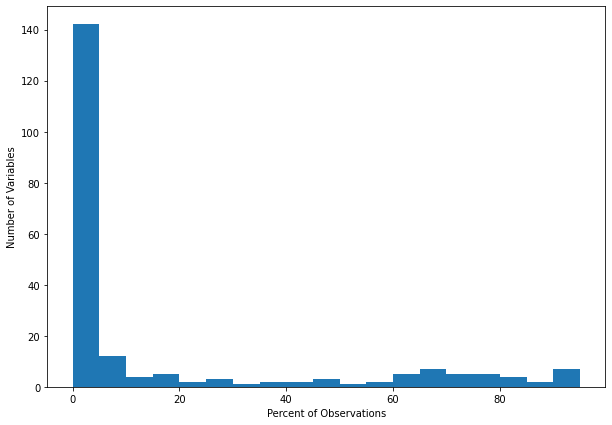

In [1494]:
#histogram of variable frequency for PURCHASE VISITS

fig, ax = plt.subplots(figsize =(10, 7))

ax.hist(purchase_percent.iloc[0,:], bins = range(0,100,5))

plt.xlabel("Percent of Observations")
plt.ylabel("Number of Variables")

In [1495]:
#Based on histogram distribution, we store features with a 5% or more values

features = list()

for names in purchase_percent.columns:
    
    if (purchase_percent[names][0]) > 5:

        features.append(names)

In [1496]:
len(features)

142

In [1448]:
#subset data frame with selected features

df_first_subset = df_first_visit[features]

In [1449]:
df_first_subset.head(1)

,target,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar2,pageurl,pagename,productlist,sitesection,category,subcategory,subcategory2,pagecategory,searchresults,myaccountengagement,formanalysis,emailsubscriptionremove,prop29,prop33,prop34,prop38,prop44,state,useragent,zip,searchengine,excludehit,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,productfindingmethods,paymentmethod,shippingmethod,warrantycategory,crosssoldproduct,evar23,evar24,scene7,evar28,addonsymal,mvtparameters,evar35,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,paidsearchrawquery,post_evar7,post_evar8,post_evar9,post_evar12,post_evar13,post_evar17,post_evar23,post_evar24,post_evar25,post_evar27,post_evar28,post_evar30,post_evar33,post_evar35,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar48,post_evar49,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar56,evar61,evar68,evar72,evar77,evar79,evar83,evar84,evar90,evar91,evar96,initialloaddate,updatedloaddate,devicetype
40243,0,18598982044,hit_data_fingerhutcomprod_2022-12-10.tsv,39955,FDM,6219599642475497456,6803658491431386667,1,2022-12-10,2022-12-10,12,2022,12,50,1670652000,pe,en-US,"111,145,155,171,10038,10039,10049,10051,10096",U,94.176.80.21,10,no link_name,https://www.fingerhut.com/product/NOBV1,pdp:Los Angeles Pop Art Womenâ€™s Word-Art Pul...,None,None,None,None,None,product detail page,None,None,None,https://www.fingerhut.com/product/NOBV1,None,None,6a5d0c4252424465bf6a0d0b738ebc90,None,None,None,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_1...,None,0,0,3609806571,518,1251,Y,N,Y,2,2,0,94.176.80.21,9/11/2022 22:0:0 5 480,7,45,1377654891,218,1670652000,1670652000,1670652000,0,0,None,None,0,2,0,san francisco,usa,ca,0,0,0,0,0,0,None,None,None,https://www.fingerhut.com/product/NOBV1,None,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,None,https://www.fingerhut.com/product/NOBV1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,0,None,0,0,None,680365849143138666762195996424754974561,68036584914313866676219599642475497456,0,pdp:Los Angeles Pop Art Womenâ€™s Word-Art Pul...,None,None,lg,None,None,None,None,None,None,None,2022-12-11 02:43:15,2022-12-11 02:43:15,Desktop


In [1450]:
# manually remove redundant variables, useless variables. or variables we did not want to weigh highly - such as date

removed = ['hitdatahistorymkey', 'filename', 'linenumber', 'visitoridhigh', 'visitoridlow',
          'visitdatetime', 'visitdate', 'visitmonth', 'visitid', 'fiscalyear', 'fiscalweeknumber', 'fiscalmonthnumber',
          'visitstarttimegmt', 'firsthittimegmt', 'lasthittimegmt', 'initialloaddate', 'updatedloaddate',
          'checkoutthankyouflag', 'cookieid']

In [1497]:
for variables in df_first_subset.columns:
    
    if variables in removed:
        
        features.remove(variables) 

In [1498]:
len(features)

123

In [1499]:
#subset dataframe with manually chosen features removed

df_second_subset = df_first_subset[features]

In [1500]:
df_second_subset.head(1)

,target,brandcode,visitnumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar2,pageurl,pagename,productlist,sitesection,category,subcategory,subcategory2,pagecategory,searchresults,myaccountengagement,formanalysis,emailsubscriptionremove,prop29,prop33,prop34,prop38,prop44,state,useragent,zip,searchengine,excludehit,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,resolution,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,productfindingmethods,paymentmethod,shippingmethod,warrantycategory,crosssoldproduct,evar23,evar24,scene7,evar28,addonsymal,mvtparameters,evar35,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,paidsearchrawquery,post_evar7,post_evar8,post_evar9,post_evar12,post_evar13,post_evar17,post_evar23,post_evar24,post_evar25,post_evar27,post_evar28,post_evar30,post_evar33,post_evar35,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar48,post_evar49,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,evar56,evar61,evar68,evar72,evar77,evar79,evar83,evar84,evar90,evar91,evar96,devicetype
40243,0,FDM,1,1670652000,pe,en-US,"111,145,155,171,10038,10039,10049,10051,10096",U,94.176.80.21,10,no link_name,https://www.fingerhut.com/product/NOBV1,pdp:Los Angeles Pop Art Womenâ€™s Word-Art Pul...,None,None,None,None,None,product detail page,None,None,None,https://www.fingerhut.com/product/NOBV1,None,None,6a5d0c4252424465bf6a0d0b738ebc90,None,None,None,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_1...,None,0,0,3609806571,518,1251,Y,N,Y,2,2,0,94.176.80.21,9/11/2022 22:0:0 5 480,7,45,1377654891,218,0,0,None,None,0,2,0,san francisco,usa,ca,0,0,0,0,0,0,None,None,None,https://www.fingerhut.com/product/NOBV1,None,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,None,https://www.fingerhut.com/product/NOBV1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,0,None,0,0,None,pdp:Los Angeles Pop Art Womenâ€™s Word-Art Pul...,None,None,lg,None,None,None,None,None,None,None,Desktop


In [1502]:
#replace n/a or type none values with a string "None"
#the absence of a value is sometimes useful information

df_second_subset = df_second_subset.fillna("None")

In [1936]:
seeValues(df_second_subset, 'eventlist')

,eventlist,counts
0,10004,2008
1,124,1835
2,"20598,10004",1223
3,"20598,111,112,122,126,127,129,143,145,155,171,...",724
4,"20599,111,145,155,171,10005,10038,10039,10049,...",302
...,...,...
30083,"20113=30,20538=700,20539=344,20540=356,20541=3...",1
30084,"20113=30,20538=700,20539=308,20540=392,20541=0...",1
30085,"20113=30,20538=700,20539=29,20540=671,20541=0,...",1
30086,"20113=30,20538=700,20539=257,20540=443,20541=0...",1


In [1456]:
#variance threshold; 3rd subset method
#get rid of variables with very low variance i.e. same value every time

ord_enc = OrdinalEncoder()

variance_train = df_second_subset.loc[:, df_second_subset.columns != 'target']

variance_transformed = ord_enc.fit_transform(variance_train)

In [1503]:
#using a threshold of 0.01 would mean dropping the column where 
#99% of the values are similar

var_thr = VarianceThreshold(threshold = 0.01) 

var_thr.fit(variance_transformed)

VarianceThreshold(threshold=0.01)

In [1862]:
#create new subsetted data after variance threshold

df_third_subset = (variance_train.loc[:,var_thr.get_support()])

df_third_subset.insert(0, "target", target)

In [1863]:
features = df_third_subset.columns.to_list()

In [1864]:
len(features)

114

In [1913]:
#4th subset - random forest feature importance

#Class weights are balanced

clf = RandomForestClassifier(class_weight='balanced')

In [1914]:
#Create test and train sets 

X_train, X_test, y_train, y_test = train_test_split(df_third_subset.iloc[:,:], 
                                                    df_third_subset['target'], 
                                                    test_size=0.30)

In [1915]:
#undersample train set

X_train_1 = X_train[X_train['target'] == "1"]

y_train_1 = X_train_1['target']

X_train_2 = X_train[X_train['target'] == "0"].sample(n=len(X_train_1))

y_train_2 = X_train_2['target']

X_train = (pd.concat([X_train_1, X_train_2])).iloc[:,1:]

y_train = pd.concat([y_train_1, y_train_2])

In [1916]:
#adjust test set

X_test = X_test.iloc[:,1:]

In [1917]:
len(X_test)

13998

In [1918]:
len(X_train)

3464

In [1919]:
#Transform categorical varaibles to become Ordinal

ord_enc = OrdinalEncoder()

X_train = ord_enc.fit_transform(X_train)

y_train = ord_enc.fit_transform(y_train.to_numpy().reshape(-1,1))

X_test = ord_enc.fit_transform(X_test)

y_test = ord_enc.fit_transform(y_test.to_numpy().reshape(-1,1))

In [1920]:
#fit the model

clf.fit(X_train, y_train)

/var/folders/yl/sr_8gqks16sb02rf4bbq7zq40000gn/T/ipykernel_68848/3238707.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [1921]:
#return the feature importances

clf.feature_importances_

array([2.88009418e-02, 2.31275268e-02, 9.08050566e-04, 4.35354985e-03,
       2.24942945e-02, 2.53494856e-02, 1.47999780e-03, 4.46336694e-03,
       1.43164006e-02, 8.94090466e-03, 3.48460117e-03, 4.68052387e-03,
       4.77196477e-03, 5.19903520e-03, 5.96622031e-03, 8.18779589e-03,
       2.21361807e-03, 1.68104972e-02, 7.58975459e-03, 1.21835478e-02,
       8.50013348e-03, 5.01095494e-03, 2.10264228e-02, 1.44239100e-03,
       8.30041948e-03, 8.46871770e-03, 1.86446019e-02, 1.09723212e-02,
       1.30926678e-03, 1.04116304e-02, 2.13707436e-02, 1.50002214e-02,
       2.51969633e-03, 3.18118080e-03, 6.34101100e-03, 1.78845744e-02,
       2.45372476e-02, 9.26829153e-04, 1.37125274e-02, 1.36168163e-02,
       1.16013548e-02, 7.21624867e-03, 1.06102692e-02, 1.01694627e-02,
       1.46272285e-03, 4.82022114e-03, 5.85247713e-04, 2.34893692e-02,
       2.62358627e-05, 1.75923679e-02, 2.09517904e-03, 3.70570452e-03,
       2.21699539e-03, 3.56932703e-03, 2.94565526e-03, 8.78324301e-04,
      

In [1922]:
#accuracy of decision if tree if we were to use the whole data set 

clf.score(X_test, y_test)

0.7911844549221317

In [1923]:
y_predicted = clf.predict(X_test)

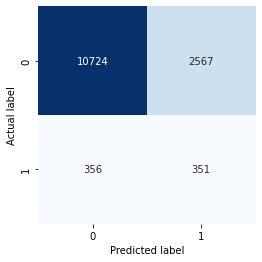

In [1924]:
labels = ['0', '1']

sns.heatmap(confusion_matrix(y_test, y_predicted), 
            square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [1925]:
#print out the features and importances

feat_list = []

total_importance = 0
# Print the name and gini importance of each feature
for feature in zip(df_third_subset.iloc[:,1:].columns, clf.feature_importances_):
    feat_list.append(feature)
    total_importance += feature[1]

included_feats = []
# Print the name and gini importance of each feature
for feature in zip(df_third_subset.iloc[:,1:].columns, clf.feature_importances_):
    if feature[1] > .05:
        included_feats.append(feature[0])

print('\n',"Cumulative Importance =", total_importance)

# create DataFrame using data
df_imp = pd.DataFrame(feat_list, columns =['FEATURE', 'IMPORTANCE']).sort_values(by='IMPORTANCE', ascending=False)
df_imp['CUMSUM'] = df_imp['IMPORTANCE'].cumsum()

df_imp.head(50)


 Cumulative Importance = 1.0000000000000002


,FEATURE,IMPORTANCE,CUMSUM
80,post_evar23,0.050214,0.050214
78,post_evar13,0.034887,0.085101
59,crosssoldproduct,0.030025,0.115126
0,visitnumber,0.028801,0.143927
5,ip,0.025349,0.169276
36,postttimeinfo,0.024537,0.193814
47,geocity,0.023489,0.217303
1,hit_time_gmt,0.023128,0.240431
4,eventlist,0.022494,0.262925
86,post_evar33,0.021698,0.284623


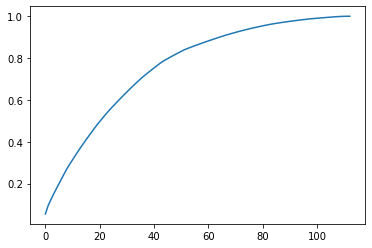

In [1902]:
#plot to see how many variables we should take

#curve flattens at around 40 and it becomes diminishing returns 

#can do cutoff earlier too if computation is too much

plt.plot(range(0,len(df_imp),1), df_imp['CUMSUM'])  

In [1903]:
df_fourth_subset = df_third_subset[df_imp.iloc[0:40, 0]]

df_fourth_subset.insert(0, "target", target)

In [1904]:
clf2 = RandomForestClassifier(class_weight='balanced')

In [1905]:
X_train, X_test, y_train, y_test = train_test_split(df_fourth_subset.iloc[:,:], df_fourth_subset['target'], test_size=0.05)

In [1906]:
X_train_1 = X_train[X_train['target'] == "1"]

y_train_1 = X_train_1['target']

X_train_2 = X_train[X_train['target'] == "0"].sample(n=len(X_train_1)+2000)

y_train_2 = X_train_2['target']

X_train = (pd.concat([X_train_1, X_train_2])).iloc[:,1:]

y_train = pd.concat([y_train_1, y_train_2])

In [1907]:
X_test = X_test.iloc[:,1:]

In [1908]:
#Transform categorical varaibles to become Ordinal

ord_enc = OrdinalEncoder()

X_train = ord_enc.fit_transform(X_train)

y_train = ord_enc.fit_transform(y_train.to_numpy().reshape(-1,1))

X_test = ord_enc.fit_transform(X_test)

y_test = ord_enc.fit_transform(y_test.to_numpy().reshape(-1,1))

In [1909]:
#fit the model

clf2.fit(X_train, y_train)

/var/folders/yl/sr_8gqks16sb02rf4bbq7zq40000gn/T/ipykernel_68848/2548501829.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [1910]:
clf2.score(X_test, y_test)

0.6798114016288042

In [1927]:
clf2.feature_importances_

array([0.07469567, 0.03982341, 0.03217524, 0.03133516, 0.03527383,
       0.03495361, 0.03357865, 0.03841611, 0.03135831, 0.0227918 ,
       0.03042117, 0.02625538, 0.02751577, 0.02631944, 0.02361507,
       0.02478833, 0.02550284, 0.02385958, 0.02620832, 0.02262991,
       0.02014359, 0.01679825, 0.02490631, 0.0196853 , 0.02051905,
       0.02559763, 0.01684637, 0.01952534, 0.01585915, 0.01732215,
       0.01855782, 0.01192766, 0.02053572, 0.01430772, 0.02143873,
       0.0228371 , 0.01421681, 0.02373988, 0.01137123, 0.01234659])

In [1911]:
y_predicted = clf2.predict(X_test)

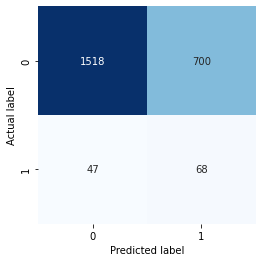

In [1912]:
labels = ['0', '1']

sns.heatmap(confusion_matrix(y_test, y_predicted), 
            square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()